In [47]:
from fit_completeness_to_catalog import *
import os
name = "sullivan"
cut_to_Ms = True
nwalkers = 16
ndim = 8
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
catalog, num_stars = get_catalog_and_numstars(name, cut_to_Ms)
num_stars = 200000
if os.path.isfile('synth{}.h5'.format(str(num_stars))):
    synth = pd.read_hdf('synth{}.h5'.format(str(num_stars)))
else:
    print("Making synth solar systems")
    synth = make_synth_solar_systems(num_stars=num_stars)
    synth.to_hdf('synth{}.h5'.format(str(num_stars)), key='synth')
synth = synth[synth.transit_bool]
hist_synth, hist_catalog = make_hists(synth, catalog, plot=False)
print("Injected {} transiting planets".format(int(np.sum(hist_synth))))

Selected 200000 stars
Injected 12399 transiting planets


In [50]:
ll, p0 = make_mcmc_setup(hist_synth, hist_catalog, nwalkers)
sampler = emcee.EnsembleSampler(nwalkers, ndim, ll)
_ = sampler.run_mcmc(p0, 1000, progress="notebook")
sampler.reset()
pos, _, _ = sampler.run_mcmc(p0, 10000, store=True, progress="notebook")

Found least-squares solution: [ 0.05169212 -0.31195215 -0.00288642 -0.02043352  0.87570022  0.53354506
 -0.82618592  0.25632849]
Set initial condition


In [51]:
leastsq = p0[0]
print(ll(leastsq))
print(ll(leastsq + np.random.normal(0, 1e-3, size=ndim)))

-1047.9149393653215
-1047.9834819515709


In [52]:
i = 0
for _ in range(5):
    try:
        print(sampler.get_autocorr_time())
        break
    except BaseException:
        newstart = np.mean(sampler.chain[:,-1000:,:], axis=1)
        sampler.run_mcmc(newstart, 1000, store=True, progress='notebook')
        print(i)
        i += 1

emcee: Exception while calling your likelihood function:
  params: [ 6.96606452e-02 -3.10878275e-01  8.72311717e-04  2.33379930e-01
  7.86118223e-01  5.16192119e-01 -4.85246258e-02 -1.64924639e+00]
  args: []
  kwargs: {}
  exception:



Traceback (most recent call last):
  File "<ipython-input-52-efd5ebb5c7e0>", line 4, in <module>
    print(sampler.get_autocorr_time())
  File "/Users/adityasengupta/anaconda3/lib/python3.7/site-packages/emcee/ensemble.py", line 526, in get_autocorr_time
    return self.backend.get_autocorr_time(**kwargs)
  File "/Users/adityasengupta/anaconda3/lib/python3.7/site-packages/emcee/backends/backend.py", line 150, in get_autocorr_time
    return thin * autocorr.integrated_time(x, **kwargs)
  File "/Users/adityasengupta/anaconda3/lib/python3.7/site-packages/emcee/autocorr.py", line 110, in integrated_time
    raise AutocorrError(tau_est, msg)
emcee.autocorr.AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 8 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 200;
tau: [ 992.24842104  637.49858797  640.38666202 1096.83869211 1050.36732457
  674.34691143  500.80882477 1078.93648505]

During handling of the above exception, anothe

KeyboardInterrupt: 

In [34]:
sampler.get_autocorr_time()

AutocorrError: The chain is shorter than 50 times the integrated autocorrelation time for 8 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 306;
tau: [1738.92585499  518.79009507  754.18141987 1773.3677012  1764.12537903
  676.33452604  578.70781554  775.38107909]

In [35]:
sampler.chain.shape

(16, 15278, 8)

In [61]:
sampler.run_mcmc(np.mean(sampler.chain, axis=1), 20000, progress='notebook')

State([[-4.00341721e-02  1.23399016e+00 -1.19090534e+00  6.00335814e+00
   1.70054340e-02  6.38980421e-01 -3.51106571e-01 -3.96799483e+01]
 [-1.64643264e-04 -2.73936640e+00 -1.00923390e+00 -2.66604905e+00
   2.18413386e+00  6.40409102e-01 -2.33754375e-01 -1.04233024e+02]
 [-1.91814110e-04 -1.67366380e+00 -2.20388036e+00 -1.23434263e+01
   2.05929285e+00  6.51812860e-01 -5.29344456e-02 -3.22425471e+00]
 [ 2.18178391e-01 -3.26481179e-01 -1.88700206e-03  3.99062912e-01
   1.47655270e-01  7.04410048e-01  2.90843388e-01 -5.02135510e+01]
 [-2.61420634e-04 -2.09860333e+00  2.52571194e+00 -2.30338763e+00
   1.11341845e+00  6.63828800e-01  1.34669415e-01 -5.05727169e+00]
 [-6.44629662e-02 -1.57714587e+00  1.94763428e-01 -4.39606485e+00
   2.56523864e-02  5.35248406e-01  4.22128809e-01 -9.53626188e+01]
 [-1.43226884e-04 -1.98558256e+00 -1.97478268e+00 -9.82254762e+00
   2.67172232e+00  7.19978615e-01  5.23015348e-02 -3.68776432e+01]
 [-2.21264597e-04 -1.33905096e+00  1.32624700e+00 -1.73464816e+

[ -39.67994829 -104.2330245    -3.22425471  -50.21355096   -5.05727169
  -95.36261884  -36.87764316    0.11969865  -10.62109942  -66.23116797
  -90.95003833  -33.28988593  -49.79891894  -86.62889402  -64.42881454
  -69.86219319]
-50.00623495021141


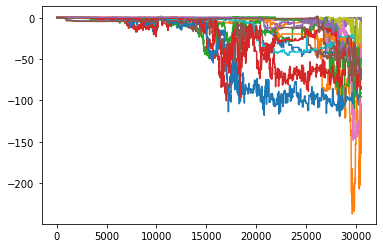

In [77]:
chain_parts = sampler.chain[:, :, 7]
print(chain_parts[:,-1])
print(np.median(chain_parts[:,-1]))
for i in range(16):
    plt.plot(sampler.chain[i,:,7])

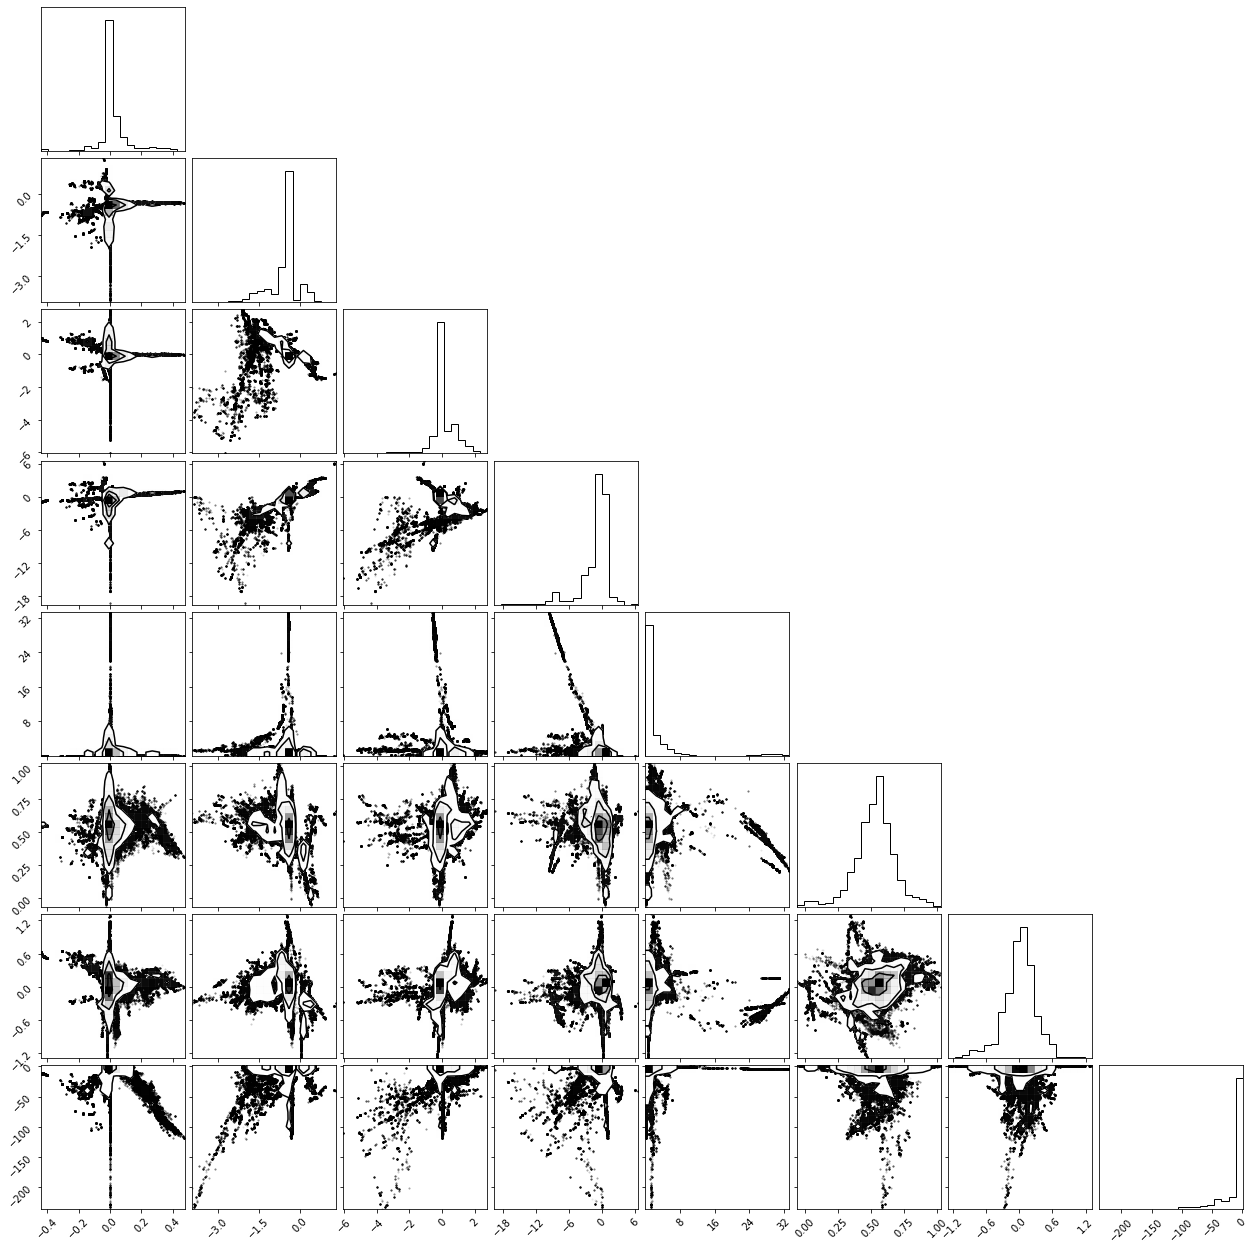

In [63]:
_ = corner.corner(sampler.flatchain) # check autocorrelation times

In [82]:
from IPython.display import display, Math
labels = ['p0', 'p1', 'p2', 'p3', 'r0', 'r1', 'r2', 'r3']

best_params = np.empty(ndim,)
for i in range(ndim):
    mcmc = np.percentile(sampler.get_chain(thin=15, flat=True)[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    best_params[i] = mcmc[1]
    display(Math(txt))
# cut off days at 27, or at 90th percentile for TOIs||

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [83]:
comp_p = comp_poly(np.log(bins_p), *best_params[:4])
comp_r = comp_poly(np.log(bins_r), *best_params[4:])
comp_p -= np.min(comp_p)
comp_p /= np.max(comp_p)
comp_r -= np.min(comp_r)
comp_r /= np.max(comp_r)

In [84]:
comp_p

array([1.        , 0.71058248, 0.49608241, 0.34526552, 0.24689752,
       0.18974414, 0.16257108, 0.15414408, 0.15322885, 0.1485911 ,
       0.12899657, 0.08321096, 0.        ])

In [85]:
comp_r

array([0.        , 0.01821005, 0.04044212, 0.06709977, 0.09858657,
       0.13530609, 0.17766189, 0.22605753, 0.28089659, 0.34258264,
       0.41151923, 0.48810993, 0.57275832, 0.66586795, 0.7678424 ,
       0.87908522, 1.        ])

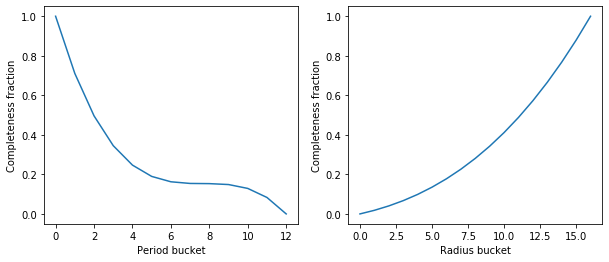

In [86]:
plot_marginalized_comps(comp_p, comp_r)

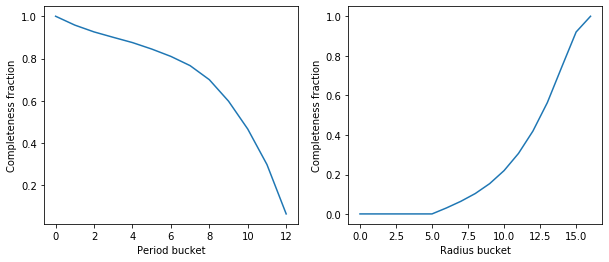

In [87]:
comp04m = np.load('ballard_data/Completeness_0.4Msun.npy')
num_iters = 100
rcomp_marginalized = np.mean(comp04m[-1].dot(np.random.uniform(size=(13,num_iters))), axis=1)
rcomp_marginalized /= rcomp_marginalized[-1]
pcomp_marginalized = np.mean(comp04m[-1].T.dot(np.random.uniform(size=(17,num_iters))), axis=1)
pcomp_marginalized /= pcomp_marginalized[0]
plot_marginalized_comps(pcomp_marginalized, rcomp_marginalized)

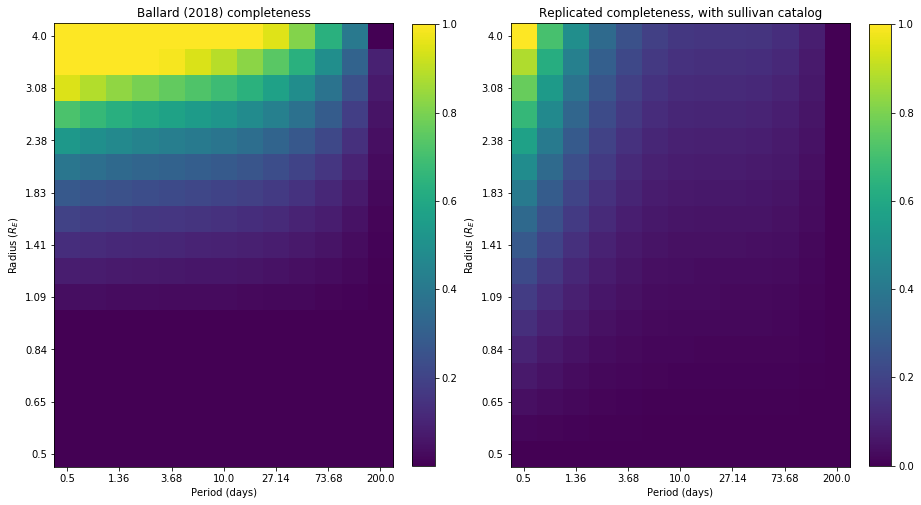

In [88]:
repcomp = np.outer(comp_p, comp_r).T
plot_overall_comps(repcomp, name)